In [55]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [56]:
insurance_data  = pd.read_csv('/content/sample_data/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [57]:
insurance_data.shape

(1338, 7)

In [58]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [59]:
insurance_data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [60]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<Figure size 600x600 with 0 Axes>

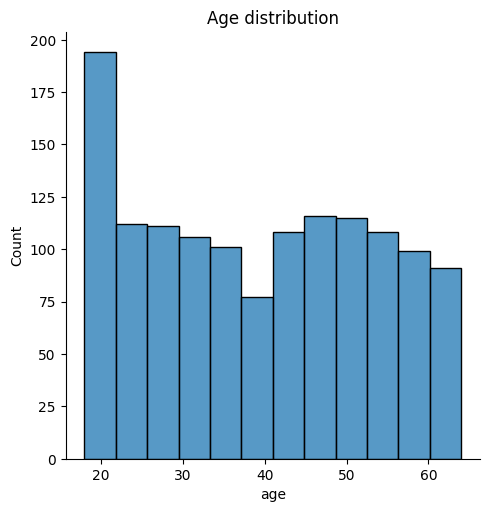

In [61]:
#show
sns.set
plt.figure(figsize =(6,6))
sns.displot(insurance_data['age'])
plt.title('Age distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

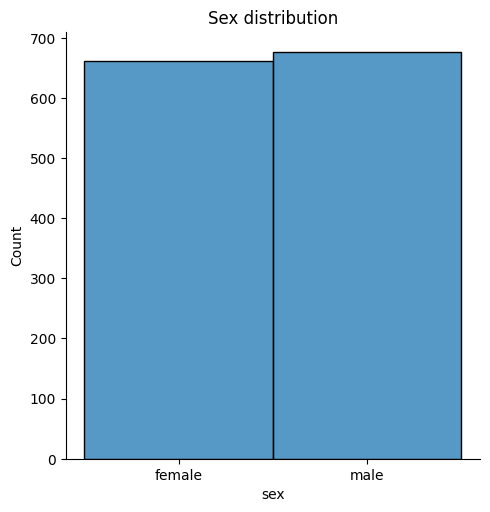

In [62]:
sns.set
plt.figure(figsize =(6,6))
sns.displot(insurance_data['sex'])
plt.title('Sex distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

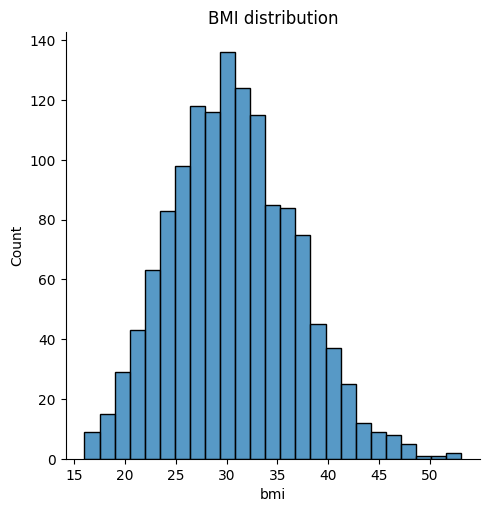

In [63]:
plt.figure(figsize =(6,6))
sns.displot(insurance_data['bmi'])
plt.title('BMI distribution')
plt.show()

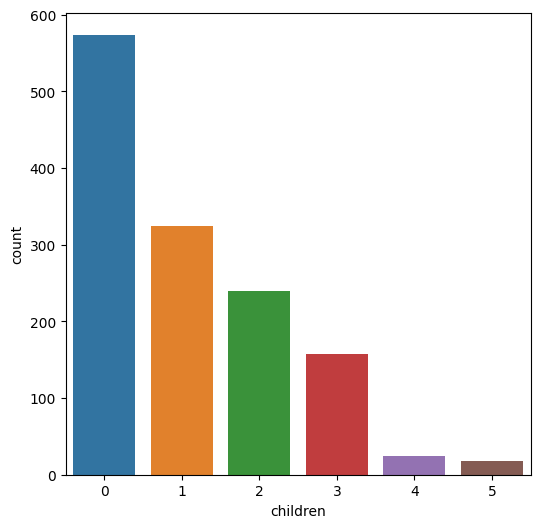

In [64]:
plt.figure(figsize =(6,6))
sns.countplot(x = 'children', data = insurance_data)
plt.show()

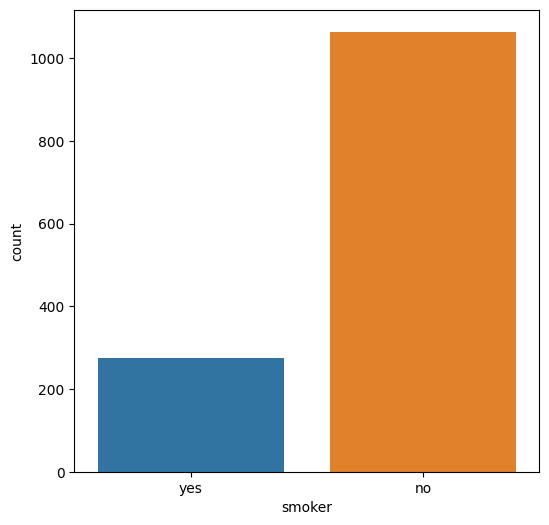

In [65]:
plt.figure(figsize =(6,6))
sns.countplot(x = 'smoker', data = insurance_data)
plt.show()

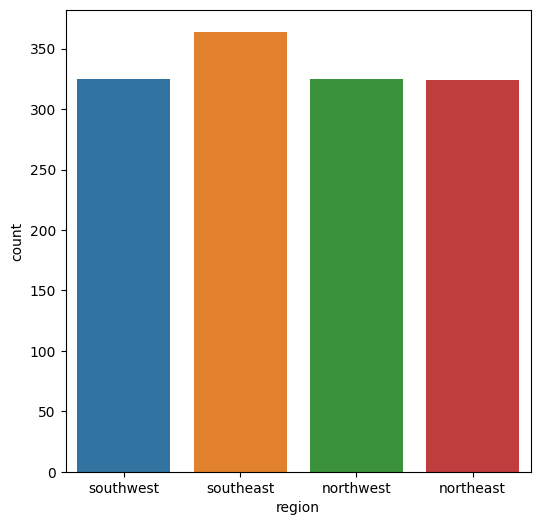

In [66]:
plt.figure(figsize =(6,6))
sns.countplot(x = 'region', data = insurance_data)
plt.show()

<Figure size 600x600 with 0 Axes>

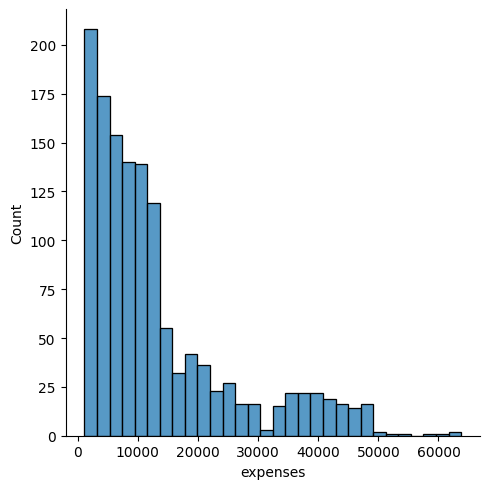

In [67]:
plt.figure(figsize =(6,6))
sns.displot( insurance_data['expenses'])
plt.show()

In [68]:
insurance_data['age'].value_counts()



18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [69]:
insurance_data['sex'].value_counts()         
   

male      676
female    662
Name: sex, dtype: int64

In [70]:
insurance_data['bmi'].value_counts()         


27.6    17
33.3    17
28.9    16
32.3    15
29.8    14
        ..
39.0     1
40.8     1
20.3     1
18.5     1
53.1     1
Name: bmi, Length: 275, dtype: int64

In [71]:
insurance_data['children'].value_counts()   


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [72]:
insurance_data['smoker'].value_counts()      


no     1064
yes     274
Name: smoker, dtype: int64

In [73]:
insurance_data['region'].value_counts()      


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [74]:
insurance_data['expenses'].value_counts()

1639.56     2
16884.92    1
29330.98    1
2221.56     1
19798.05    1
           ..
7345.08     1
26109.33    1
28287.90    1
1149.40     1
29141.36    1
Name: expenses, Length: 1337, dtype: int64

In [75]:
#encoeding the data objects 

insurance_data.replace({'sex':{'male':0,'female':1}},inplace = True)
insurance_data.replace({'smoker':{'no':0,'yes':1}},inplace = True)
insurance_data.replace({'region':{'southeast':0, 'southwest' :1, 'northwest':2, 'northeast':3}},inplace = True)

In [76]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,1,16884.92
1,18,0,33.8,1,0,0,1725.55
2,28,0,33.0,3,0,0,4449.46
3,33,0,22.7,0,0,2,21984.47
4,32,0,28.9,0,0,2,3866.86


In [93]:
#split the data
x = insurance_data.drop(columns = 'expenses',axis = 1)
y = insurance_data['expenses']
print(x)
print(y)

      age  sex   bmi  children  smoker  region
0      19    1  27.9         0       1       1
1      18    0  33.8         1       0       0
2      28    0  33.0         3       0       0
3      33    0  22.7         0       0       2
4      32    0  28.9         0       0       2
...   ...  ...   ...       ...     ...     ...
1333   50    0  31.0         3       0       2
1334   18    1  31.9         0       0       3
1335   18    1  36.9         0       0       0
1336   21    1  25.8         0       0       1
1337   61    1  29.1         0       1       2

[1338 rows x 6 columns]
0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64


In [88]:
#train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [89]:
#model training 

model = LinearRegression()
model.fit(x_train,y_train)



LinearRegression()

In [90]:
#preidctoin and error check  for training model

training_data_prediction = model.predict(x_train)

#error score  check 
error_check = metrics.r2_score(y_train,training_data_prediction)
print(error_check)


#preidctoin and error check  for testing model

test_data_prediction = model.predict(x_test)

#error score  check 
error_check = metrics.r2_score(y_test,test_data_prediction)
print(error_check)

0.751837854527264
0.7454563557182592


In [101]:
#building a prediction model 

input_data = (1	,25,	74,0	,1,	0	)

#change to array using numpy
input_data_numpy = np.asarray(input_data) 

#reshaped 
input_data_reshaped = input_data_numpy.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print('The Prediction Was : ', prediction)

The Prediction Was :  [37029.18177568]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
